image= tensor([[0.8591, 0.7872, 0.9561, 0.8969, 0.7553, 0.1813],
        [0.1469, 0.6568, 0.8806, 0.4949, 0.8107, 0.4025],
        [0.2246, 0.8369, 0.7952, 0.8936, 0.8795, 0.0971],
        [0.8675, 0.1256, 0.9136, 0.4008, 0.6460, 0.2811],
        [0.5862, 0.7832, 0.3676, 0.9741, 0.0938, 0.4482],
        [0.7913, 0.5600, 0.9340, 0.5363, 0.3098, 0.3481]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.8591, 0.7872, 0.9561, 0.8969, 0.7553, 0.1813],
          [0.1469, 0.6568, 0.8806, 0.4949, 0.8107, 0.4025],
          [0.2246, 0.8369, 0.7952, 0.8936, 0.8795, 0.0971],
          [0.8675, 0.1256, 0.9136, 0.4008, 0.6460, 0.2811],
          [0.5862, 0.7832, 0.3676, 0.9741, 0.0938, 0.4482],
          [0.7913, 0.5600, 0.9340, 0.5363, 0.3098, 0.3481]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[6.1436, 7.1983, 7.3628, 5.4118],
          [5.4477, 5.9980, 6.7149, 4.9063],
          [5.5004, 6.0906, 5

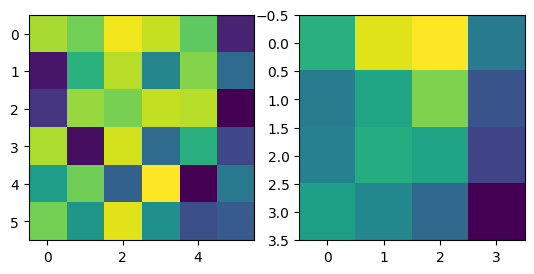

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt




image = torch.rand(6,6)
print("image=", image)

#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)

kernel = torch.ones(3,3)
# kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)
#Perform the convolution
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)
print("image.shape=", outimage.shape)

im = torch.squeeze(image)
out = torch.squeeze(outimage)
arr = [im, out]
# out = out[:2]
for i in range(0, 2):
    plt.subplot(1, 2, 1+i)
    plt.imshow(arr[i])
plt.show()

# Q2

In [2]:
# image = torch.rand(36,36)
print(image)
kernel = nn.Conv2d(1, 3, 3, stride=1, padding = 0, bias=False)
m = kernel(image)
print(m, "/n",f"{m.shape}")

p = [n.data for n in kernel.parameters()][0]
f = F.conv2d(image, p, padding = 0)

print(f)

print(f.shape)


tensor([[[[0.8591, 0.7872, 0.9561, 0.8969, 0.7553, 0.1813],
          [0.1469, 0.6568, 0.8806, 0.4949, 0.8107, 0.4025],
          [0.2246, 0.8369, 0.7952, 0.8936, 0.8795, 0.0971],
          [0.8675, 0.1256, 0.9136, 0.4008, 0.6460, 0.2811],
          [0.5862, 0.7832, 0.3676, 0.9741, 0.0938, 0.4482],
          [0.7913, 0.5600, 0.9340, 0.5363, 0.3098, 0.3481]]]])
tensor([[[[-0.6817, -0.5753, -0.5886, -0.6534],
          [-0.4608, -0.4409, -0.5927, -0.2400],
          [-0.3775, -0.6422, -0.5312, -0.5634],
          [-0.4277, -0.3452, -0.5864, -0.1738]],

         [[-0.0978,  0.0100,  0.0126, -0.0056],
          [-0.1417, -0.0062, -0.1466,  0.1017],
          [-0.1926,  0.0207, -0.1565,  0.1965],
          [-0.0995, -0.0562, -0.0937,  0.0709]],

         [[ 0.0300, -0.1137, -0.1658, -0.0754],
          [ 0.1231, -0.0161,  0.0252, -0.1286],
          [-0.2514,  0.0660, -0.2726,  0.0702],
          [-0.0857, -0.1355, -0.0629, -0.1751]]]],
       grad_fn=<ConvolutionBackward0>) /n torch.Size([

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 4, 3])


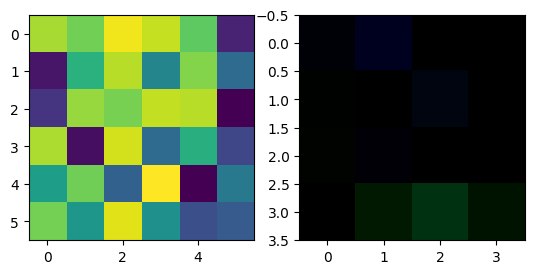

In [3]:
f.shape
# f =f[-1::]
f = torch.squeeze(f)
f = f.permute(2,1,0)
print(f.shape)

img = torch.squeeze(image)
arr = [img, f]
for i in range(0, 2):
    plt.subplot(1, 2, 1+i)
    plt.imshow(arr[i])
plt.show()

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [5]:

transform = transforms.ToTensor()

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform = ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform = ToTensor())

data_loading_params = {'batch_size': 16,
                       'shuffle': True,
                       'num_workers': 6
                      }

train_data = torch.utils.data.DataLoader(mnist_trainset, **data_loading_params)
test_data = torch.utils.data.DataLoader(mnist_testset, **data_loading_params)

In [6]:
class ConvNN(nn.Module):
    
    def __init__(self, channels, kernels, layers):
        super(ConvNN, self).__init__()
        
        self.conv = nn.ModuleList([nn.Conv2d(c, channels[i+1], k) for (i, c), k in zip(enumerate(channels[:-1]), kernels)])
        self.linear = nn.ModuleList([nn.Linear(v, layers[i+1]) for i, v in enumerate(layers[:-1])])
        self.pool = nn.MaxPool2d(2, 2)
        self.softmax = nn.Softmax(dim=1)
    
    
    def forward(self, x):
        for i, l in enumerate(self.conv):
            x = self.pool(
                F.relu(
                l(x)
            ))
        
        x = torch.flatten(x, 1)

        for i, l in enumerate(self.linear[:-1]):
            x = F.relu(l(x))

        x = self.softmax(self.linear[-1](x))

        return x

    def parameter_count(self):
        return sum(p.numel() for p in self.parameters())
        

def fit(model, train_data, criterion, optimizer, num_epochs=10):

    for epoch in tqdm(range(num_epochs), desc="Epochs", leave=False):
        for local_batch, local_labels in tqdm(train_data, desc="Batches", leave=False):
    
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)
                
            optimizer.zero_grad()
            loss = criterion(model(local_batch), local_labels)
    
            loss.backward()
            optimizer.step()

In [7]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(model, data_loader):

    y_true = []
    y_pred = []

    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(data_loader, leave=False):
            images, labels = images.to(device), labels.to(device)
    
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            correct += (predicted == labels).sum().item()
            total += len(labels)

            nlabels = labels.data.cpu().numpy()
            predicted = predicted.data.cpu().numpy()
            
            y_pred.extend(predicted)
            y_true.extend(nlabels)

    cf_matrix = confusion_matrix(y_true, y_pred)
    acc = 100 * correct / total
    
    return cf_matrix, acc
            

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ConvNN(
    channels=[1, 64, 128, 64], 
    kernels=[5, 3, 3], 
    layers=[64, 25, 10], 
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

fit(model, train_data, criterion, optimizer)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

In [9]:


train_cf, train_acc = get_confusion_matrix(model, train_data)
test_cf, test_acc = get_confusion_matrix(model, test_data)



  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

In [10]:
print(train_acc, test_acc)

97.43666666666667 97.51


In [ ]:
small_model = ConvNN(
    channels=[1, 5, 3],
    kernels=[5, 3],
    layers=[75, 25, 10]
).to(device)

s_optimizer = torch.optim.Adam(small_model.parameters(), lr=0.001)

fit(small_model, train_data, criterion, s_optimizer)

train_cf_s, train_acc_s = get_confusion_matrix(small_model, train_data)
test_cf_s, test_acc_s = get_confusion_matrix(small_model, test_data)

print(f'Small model: num_params={small_model.parameter_count()}, train_acc={train_acc_s}, test_acc={test_acc_s}')


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]

Batches:   0%|          | 0/3750 [00:00<?, ?it/s]